<a href="https://colab.research.google.com/github/liulixiang1988/research/blob/master/Keras%E7%AC%94%E8%AE%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras笔记

## 1. Keras简介

## 2. Keras安装

需要安装的包：

- NumPy
- SciPy
- Pyyaml: 用于模块加载和保存
- Matplotlib
- h5py:一些数据集用hdf5格式存储的

因为keras只是前端，因此也依赖后端，如tensorflow.

上面安装完后就能可以安装keras了。

```
pip install keras
```

user目录下的`.keras/keras.json`定义了keras的配置。

## 2.神经网络数学基础

### 2.1 通过MNIST了解神经网络

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

网络架构

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

要想训练网络，我们还需要选择**编译**（compile）步骤的三个参数。

- **损失函数**（loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。
- **优化器**（optimizer）：基于训练数据和损失函数来更新网络的机制。
- **在训练和测试过程中需要监控的指标**（metric）：本例只关心精度，即正确分类的图像所占的比例。

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
# 数据转换为float32，范围0-1
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

# 准备标签
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 训练网络
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 5s 89us/step - loss: 0.2635 - acc: 0.9228
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1067 - acc: 0.9675
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0712 - acc: 0.9784
Epoch 4/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0521 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0396 - acc: 0.9884


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test_acc: 0.9788


### 2.2 神经网络数据表示

- 维度(dimension)或称为轴(axis):`ndim`
- 形状(3, 3, 5): `shape`
- 数据类型: `dtype`

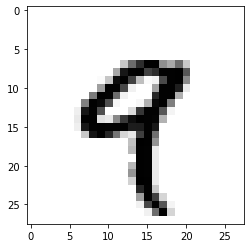

In [13]:
digit = train_images[4].reshape(28, 28)

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 2.2.1 数据批量的概念

深度学习中所有数据张量的第一个轴（0轴，因为索引从0开始）都是**样本轴**（samples axis，有时也叫**样本维度**）.

批量轴（batch axis）或批量维度（batch dimension）

#### 2.2.2 现实世界中的数据张量

- 向量数据：2D张量，形状为`(samples,features)`。
- 时间序列数据或序列数据：3D 张量，形状为 `(samples,timesteps,features)`。
- 图像：4D 张量，形状为`(samples, height, width, channels)`或`(samples,channels,height,width)`。
- 视频：5D张量，形状为`(samples,frames,height,width,channels)`或`(samples,frames,channels,height,width)`。